# **DATA CLEANING NOTEBOOK**

<br>

## Objectives

* Clean the data to prepare it for the ML models

## Inputs

* outputs/datasets/collection/house_prices_after_inspection.csv

## Outputs

* Generate cleaned Train and Test sets, both saved under outputs/datasets/cleaned

## Conclusions

* Data Cleaning pipeline.
* Drop variables: [EnclosedPorch', 'WoodDeckSF']
* Handle missing values with feature engine imputation for both, categorical and numerical variables. 

---

# Change working directory to the parent folder

Access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/PP5-heritage-housing-issues/jupyter_notebooks'

Make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/PP5-heritage-housing-issues'

# Load the Data

In [4]:
import pandas as pd
df = pd.read_csv("outputs/datasets/collection/house_prices_after_inspection.csv")
df.tail()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
1455,953,694.0,3.0,No,0,Unf,953,NaN,460,RFn,...,62.0,0.0,40,5,6,953,0.0,1999,2000,175000
1456,2073,0.0,NaN,No,790,ALQ,589,NaN,500,Unf,...,85.0,119.0,0,6,6,1542,NaN,1978,1988,210000
1457,1188,1152.0,4.0,No,275,GLQ,877,NaN,252,RFn,...,66.0,0.0,60,9,7,1152,NaN,1941,2006,266500
1458,1078,0.0,2.0,Mn,49,NaN,0,112.0,240,Unf,...,68.0,0.0,0,6,5,1078,NaN,1950,1996,142125
1459,1256,0.0,3.0,No,830,BLQ,136,0.0,276,Fin,...,75.0,0.0,68,6,5,1256,736.0,1965,1965,147500


In [5]:
df_to_clean = df.copy()
df_to_clean.tail()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
1455,953,694.0,3.0,No,0,Unf,953,NaN,460,RFn,...,62.0,0.0,40,5,6,953,0.0,1999,2000,175000
1456,2073,0.0,NaN,No,790,ALQ,589,NaN,500,Unf,...,85.0,119.0,0,6,6,1542,NaN,1978,1988,210000
1457,1188,1152.0,4.0,No,275,GLQ,877,NaN,252,RFn,...,66.0,0.0,60,9,7,1152,NaN,1941,2006,266500
1458,1078,0.0,2.0,Mn,49,NaN,0,112.0,240,Unf,...,68.0,0.0,0,6,5,1078,NaN,1950,1996,142125
1459,1256,0.0,3.0,No,830,BLQ,136,0.0,276,Fin,...,75.0,0.0,68,6,5,1256,736.0,1965,1965,147500


# Data Exploration

* In notebooks 1 and 2, EDA was also carried out, in this notebook, however it will be extended because we want to clean properly the data to prepare it for modelling.

#### Quick EDA

In [6]:
df_to_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1460 non-null   int64  
 1   2ndFlrSF       1374 non-null   float64
 2   BedroomAbvGr   1361 non-null   float64
 3   BsmtExposure   1422 non-null   object 
 4   BsmtFinSF1     1460 non-null   int64  
 5   BsmtFinType1   1315 non-null   object 
 6   BsmtUnfSF      1460 non-null   int64  
 7   EnclosedPorch  136 non-null    float64
 8   GarageArea     1460 non-null   int64  
 9   GarageFinish   1225 non-null   object 
 10  GarageYrBlt    1379 non-null   float64
 11  GrLivArea      1460 non-null   int64  
 12  KitchenQual    1460 non-null   object 
 13  LotArea        1460 non-null   int64  
 14  LotFrontage    1201 non-null   float64
 15  MasVnrArea     1452 non-null   float64
 16  OpenPorchSF    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  OverallQ

In [7]:
pd.set_option('display.float_format', '{:.2f}'.format)
df_to_clean.describe()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageYrBlt,GrLivArea,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
count,1460.00,1374.00,1361.00,1460.00,1460.00,136.00,1460.00,1379.00,1460.00,1460.00,1201.00,1452.00,1460.00,1460.00,1460.00,1460.00,155.00,1460.00,1460.00,1460.00
mean,1162.63,348.52,2.87,443.64,567.24,25.33,472.98,1978.51,1515.46,10516.83,70.05,103.69,46.66,5.58,6.10,1057.43,103.74,1971.27,1984.87,180921.20
std,386.59,438.87,0.82,456.10,441.87,66.68,213.80,24.69,525.48,9981.26,24.28,181.07,66.26,1.11,1.38,438.71,135.54,30.20,20.65,79442.50
min,334.00,0.00,0.00,0.00,0.00,0.00,0.00,1900.00,334.00,1300.00,21.00,0.00,0.00,1.00,1.00,0.00,0.00,1872.00,1950.00,34900.00
25%,882.00,0.00,2.00,0.00,223.00,0.00,334.50,1961.00,1129.50,7553.50,59.00,0.00,0.00,5.00,5.00,795.75,0.00,1954.00,1967.00,129975.00
50%,1087.00,0.00,3.00,383.50,477.50,0.00,480.00,1980.00,1464.00,9478.50,69.00,0.00,25.00,5.00,6.00,991.50,0.00,1973.00,1994.00,163000.00
75%,1391.25,728.00,3.00,712.25,808.00,0.00,576.00,2002.00,1776.75,11601.50,80.00,166.00,68.00,6.00,7.00,1298.25,182.50,2000.00,2004.00,214000.00
max,4692.00,2065.00,8.00,5644.00,2336.00,286.00,1418.00,2010.00,5642.00,215245.00,313.00,1600.00,547.00,9.00,10.00,6110.00,736.00,2010.00,2010.00,755000.00


#### Evaluate dropping variables
  * All variables are descriptive features that would be a available for a prospect property. Thus, at this point no variables are being dropped.

#### Check for duplicates (the code below indicates that there are no duplicated rows)

In [8]:
duplicate_rows_mask = df_to_clean.duplicated(keep=False)
only_duplicated_values_df = df_to_clean[duplicate_rows_mask]
print(only_duplicated_values_df)

Empty DataFrame
Columns: [1stFlrSF, 2ndFlrSF, BedroomAbvGr, BsmtExposure, BsmtFinSF1, BsmtFinType1, BsmtUnfSF, EnclosedPorch, GarageArea, GarageFinish, GarageYrBlt, GrLivArea, KitchenQual, LotArea, LotFrontage, MasVnrArea, OpenPorchSF, OverallCond, OverallQual, TotalBsmtSF, WoodDeckSF, YearBuilt, YearRemodAdd, SalePrice]
Index: []

[0 rows x 24 columns]


#### Check for missing values

* Use the custom EvaluateMissingData function provided by Code Institute to understand further the Missing values in the data

In [9]:
def EvaluateMissingData(df):
    missing_data_absolute = df.isnull().sum()
    missing_data_percentage = round(missing_data_absolute/len(df)*100, 2)
    df_missing_data = (pd.DataFrame(
                            data={"RowsWithMissingData": missing_data_absolute,
                                   "PercentageOfDataset": missing_data_percentage,
                                   "DataType": df.dtypes}
                                    )
                          .sort_values(by=['PercentageOfDataset'], ascending=False)
                          .query("PercentageOfDataset > 0")
                          )

    return df_missing_data

In [10]:
df_missing_data = EvaluateMissingData(df_to_clean)
print(f"* There are {df_missing_data.shape[0]} variables with missing data \n")
df_missing_data

* There are 10 variables with missing data 



,RowsWithMissingData,PercentageOfDataset,DataType
EnclosedPorch,1324,90.68,float64
WoodDeckSF,1305,89.38,float64
LotFrontage,259,17.74,float64
GarageFinish,235,16.10,object
BsmtFinType1,145,9.93,object
BedroomAbvGr,99,6.78,float64
2ndFlrSF,86,5.89,float64
GarageYrBlt,81,5.55,float64
BsmtExposure,38,2.60,object
MasVnrArea,8,0.55,float64


* Retrive the variables with missing data as a list

In [11]:
vars_with_missing_data = df_to_clean.columns[df_to_clean.isnull().any()].to_list()
vars_with_missing_data


['2ndFlrSF',
 'BedroomAbvGr',
 'BsmtExposure',
 'BsmtFinType1',
 'EnclosedPorch',
 'GarageFinish',
 'GarageYrBlt',
 'LotFrontage',
 'MasVnrArea',
 'WoodDeckSF']

* Further explore these variables with a Profile Report

In [12]:
from ydata_profiling import ProfileReport
profile_report= ProfileReport(df=df_to_clean[vars_with_missing_data], minimal=True)
#profile_report.to_notebook_iframe()

## EDA Observations

* The variables EnclosedPorch and WoodDeckSF have more than 80 % of missing
  data. Thus, these two variables will likely be dropped. 
* 10 variables have missing values: 2ndFlrSF, BedroomAbvGr, BsmtExposure,
  BsmtFinType1, EnclosedPorch, GarageFinish, GarageYrBlt, LotFrontage, 
  MasVnrArea, and WoodDeckSF.
* The categorical variables are imbalanced.
* The categorical variables BsmtFinType1 and KitchenQual show inconsistent
  casing. Thus, for consistency apply a case transformation to all categorical
  variables.
* Most numerical variables seem to be not normally distributed. 

# Correlation and PPS Analysis

* Use and load the custom functions provided by Code Institute to further understand the correlations and predictive power of the variables

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps


def heatmap_corr(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=bool)
        mask[np.triu_indices_from(mask)] = True
        mask[abs(df) < threshold] = True

        fig, axes = plt.subplots(figsize=figsize)
        sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                    mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                    linewidth=0.5
                    )
        axes.set_yticklabels(df.columns, rotation=0)
        plt.ylim(len(df.columns), 0)
        plt.show()
        plt.close()


def heatmap_pps(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=bool)
        mask[abs(df) < threshold] = True
        fig, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                         mask=mask, cmap='rocket_r', annot_kws={"size": font_annot},
                         linewidth=0.05, linecolor='grey')
        plt.ylim(len(df.columns), 0)
        plt.show()
        plt.close()


def CalculateCorrAndPPS(df):
    df_corr_spearman = df.corr(method="spearman", numeric_only=True)
    df_corr_pearson = df.corr(method="pearson", numeric_only=True)

    pps_matrix_raw = pps.matrix(df)
    pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

    pps_score_stats = pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T
    print("PPS threshold - check PPS score IQR to decide threshold for heatmap \n")
    print(pps_score_stats.round(3))

    return df_corr_pearson, df_corr_spearman, pps_matrix


def DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman, pps_matrix, CorrThreshold, PPS_Threshold,
                      figsize=(20, 12), font_annot=8):

    print("\n")
    print("* Analyse how the target variable for your ML models are correlated with other variables (features and target)")
    print("* Analyse multi-colinearity, that is, how the features are correlated among themselves")

    print("\n")
    print("*** Heatmap: Spearman Correlation ***")
    print("It evaluates monotonic relationship \n")
    heatmap_corr(df=df_corr_spearman, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Pearson Correlation ***")
    print("It evaluates the linear relationship between two continuous variables \n")
    heatmap_corr(df=df_corr_pearson, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Power Predictive Score (PPS) ***")
    print(f"PPS detects linear or non-linear relationships between two columns.\n"
          f"The score ranges from 0 (no predictive power) to 1 (perfect predictive power) \n")
    heatmap_pps(df=pps_matrix, threshold=PPS_Threshold, figsize=figsize, font_annot=font_annot)

* Calculate Correlations and Power Predictive Score of the dataset 
  
  * Note, this analysis is a quick check of the correlations and PPS analysis
    without handing missing values yet

In [14]:
import warnings
warnings.filterwarnings(
    "ignore",
    category=FutureWarning,
    module='ppscore'
)

df_corr_pearson, df_corr_spearman, pps_matrix = CalculateCorrAndPPS(df_to_clean)


/home/cistudent/.local/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/home/cistudent/.local/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(


PPS threshold - check PPS score IQR to decide threshold for heatmap 

         count  mean  std  min  25%  50%  75%  max
ppscore 552.00  0.06 0.10 0.00 0.00 0.00 0.06 0.70


* Based on the descriptive statistics of ppscore the heatmap treshold chosen is 0.05 (and tested with 0.1 too)



* Analyse how the target variable for your ML models are correlated with other variables (features and target)
* Analyse multi-colinearity, that is, how the features are correlated among themselves


*** Heatmap: Spearman Correlation ***
It evaluates monotonic relationship 



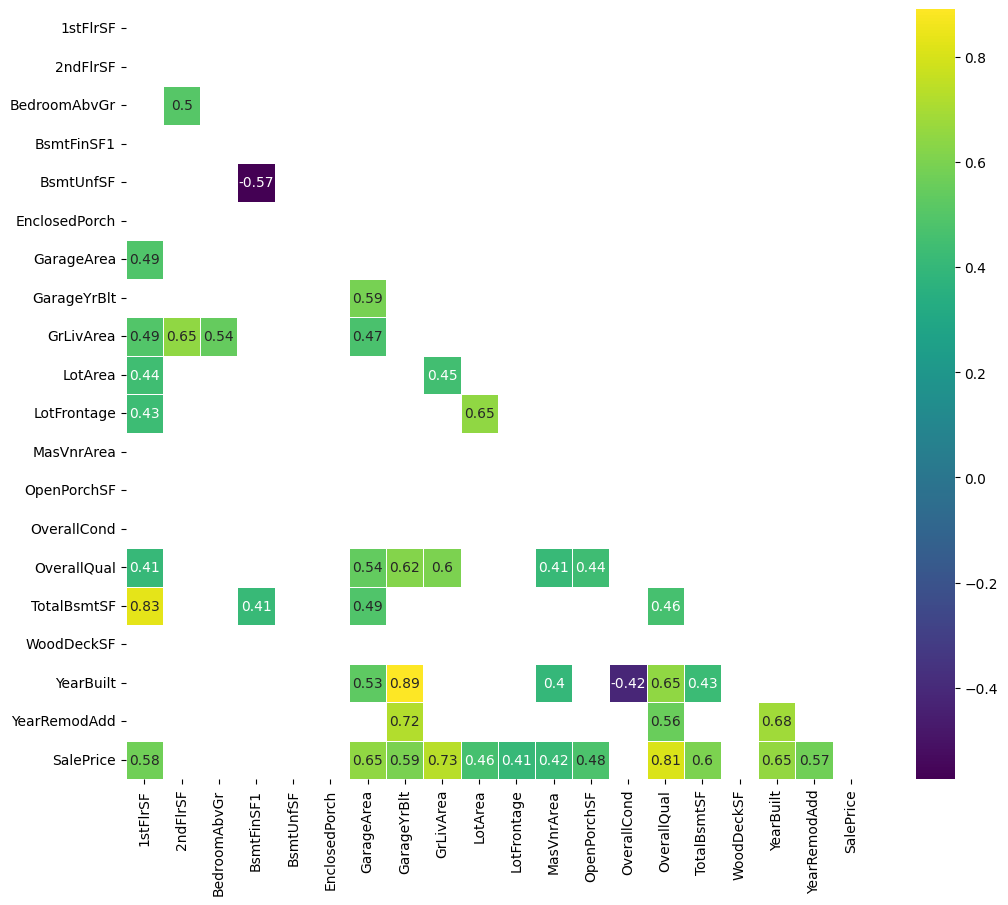



*** Heatmap: Pearson Correlation ***
It evaluates the linear relationship between two continuous variables 



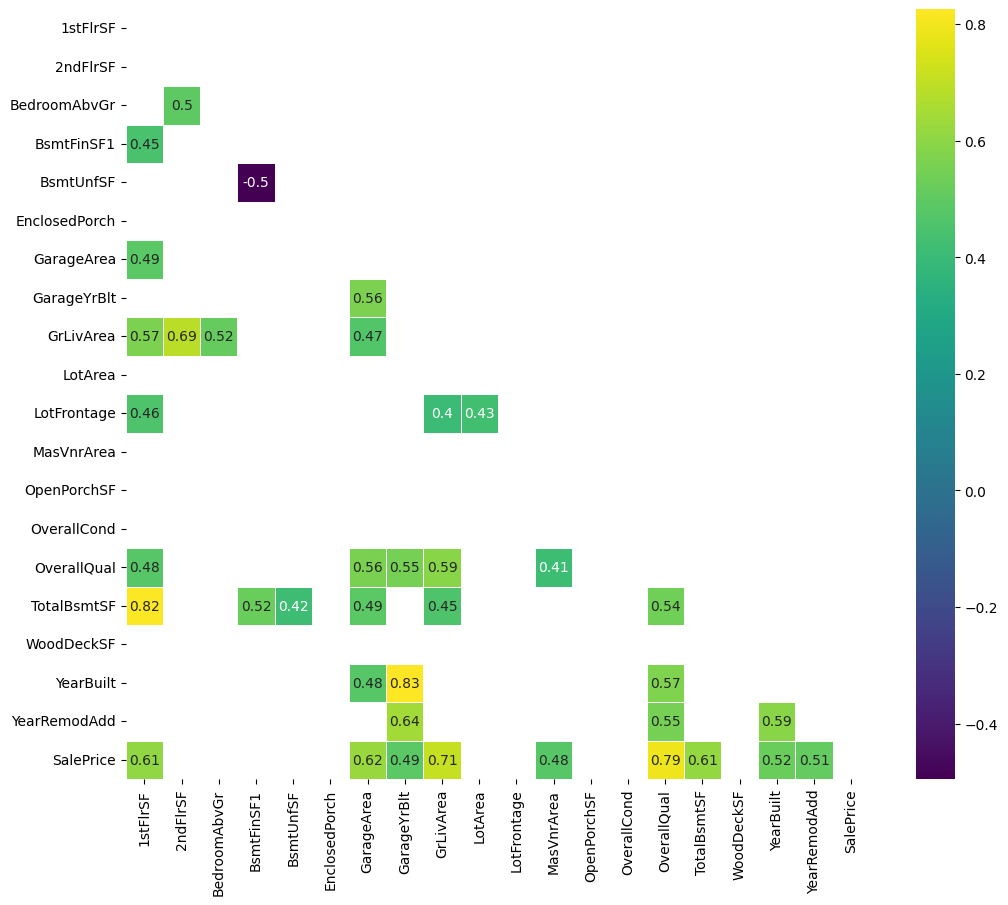



*** Heatmap: Power Predictive Score (PPS) ***
PPS detects linear or non-linear relationships between two columns.
The score ranges from 0 (no predictive power) to 1 (perfect predictive power) 



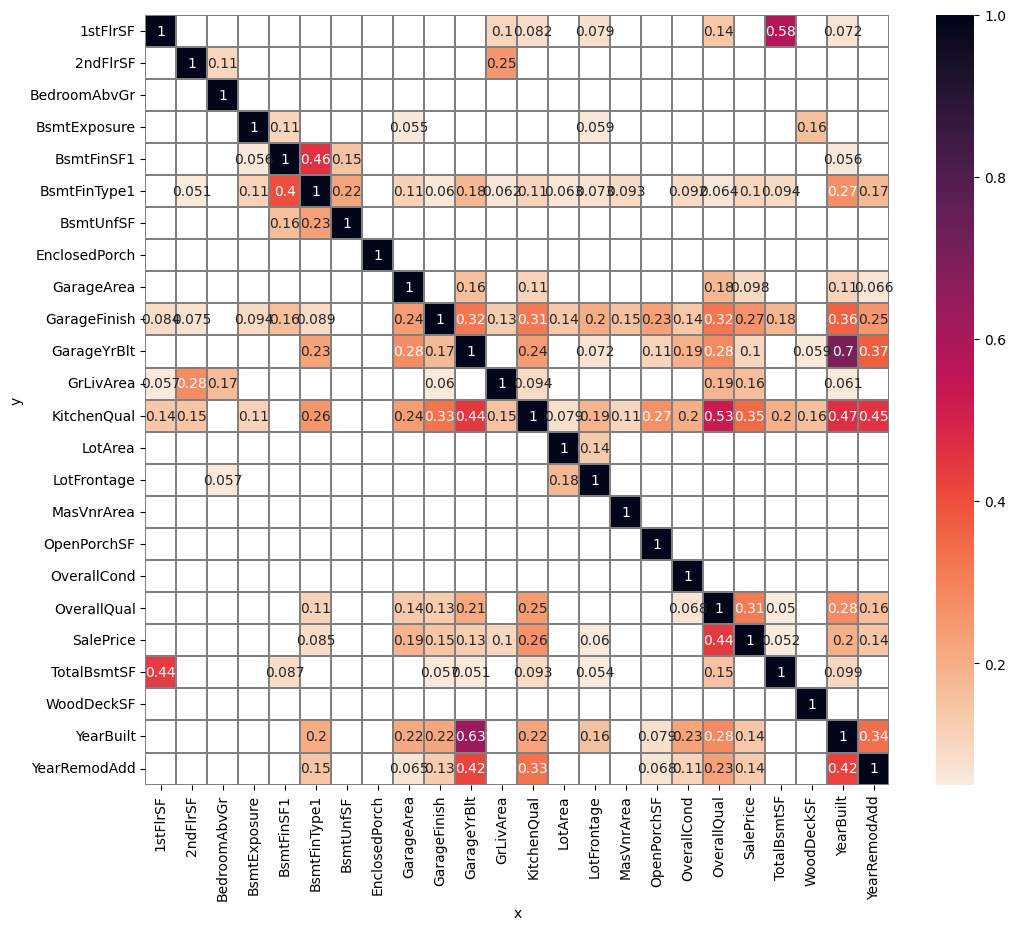

In [15]:
%matplotlib inline
DisplayCorrAndPPS(df_corr_pearson = df_corr_pearson,
                  df_corr_spearman = df_corr_spearman, 
                  pps_matrix = pps_matrix,
                  CorrThreshold = 0.4, PPS_Threshold =0.05,
                  figsize=(12,10), font_annot=10)


## Correlation and PPS Observations

* Spearman and Pearson: The correlations between the target variables and other variables are similar (from moderate to very strong).
* The analysis is coherent with what is described in notebook "2-House Sales Price Study.ipynb" regarding the top correlated variables against the target variable SalePrice.
  * Namely, in both methods the variables that show the highest correlation with the target are 1stFlrSF, GarageArea, GrLivArea, OverallQual, TotalBsmtSF and YearBuilt
* For the PPS analysis, SalePrice shows some relevant predictive power with several variables but mostly weak. However, KitchenQual and Overall quality have a strong predictive power over sales price.
* The features among themselves are correlated and show predictive power against each other.

---

# Data Cleaning to prepare data for Modeling

#### Split Train and Test Set

In [16]:
from sklearn.model_selection import train_test_split
TrainSet, TestSet, _, __ = train_test_split(
                                        df_to_clean,
                                        df_to_clean['SalePrice'],
                                        test_size=0.2,
                                        random_state=0)

print(f"TrainSet shape: {TrainSet.shape} \nTestSet shape: {TestSet.shape}")


TrainSet shape: (1168, 24) 
TestSet shape: (292, 24)


#### First Imputation approach: Drop variables

* Step 1: List the variables with more than 80 % missing values, to drop them

In [17]:
variables_to_drop = ['EnclosedPorch', 'WoodDeckSF']

print(f"* {len(variables_to_drop)} variables to drop \n\n"
    f"{variables_to_drop}")


* 2 variables to drop 

['EnclosedPorch', 'WoodDeckSF']


* Step 2: Create a separate DataFrame applying this imputation approach to the selected variables.

In [18]:
from feature_engine.selection import DropFeatures
feature_dropper  = DropFeatures(features_to_drop = variables_to_drop)
feature_dropper.fit(TrainSet)
TrainSet_feat_dropped  = feature_dropper.transform(TrainSet)

  * In this case, there is no effect on the distribution of the variable, since we removed entire columns.

* Step 3: Apply the transformation to the data

In [19]:
TrainSet_feat_dropped, TestSet_feat_dropped  = feature_dropper.transform(TrainSet) , feature_dropper.transform(TestSet)

#### Second Imputation approach: Perform Categorical Imputation

* Step 1: List the categorical variables (their missing values will be replaced with the word "Missing")

In [20]:
categorical_vars = TrainSet_feat_dropped.select_dtypes(include='object').columns.to_list()
categorical_vars

['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual']

* Step 2: Create a separate DataFrame applying this imputation approach to the selected variables.

In [21]:
from feature_engine.imputation import CategoricalImputer
categorical_imputer= CategoricalImputer(imputation_method='missing',
                                                  fill_value='Missing',
                                                  variables=categorical_vars)
categorical_imputer.fit(TrainSet_feat_dropped)
TrainSet_categ_imputed  = categorical_imputer.transform(TrainSet_feat_dropped)

/home/cistudent/.local/lib/python3.12/site-packages/feature_engine/imputation/categorical.py:232: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(X[variable]):


* Step 3:  Confirm that there are no categorical variables with misssing values

In [22]:
EvaluateMissingData(TrainSet_categ_imputed)

,RowsWithMissingData,PercentageOfDataset,DataType
LotFrontage,212,18.15,float64
BedroomAbvGr,80,6.85,float64
2ndFlrSF,60,5.14,float64
GarageYrBlt,58,4.97,float64
MasVnrArea,6,0.51,float64


* Step 4: Apply the transformation to the data

In [23]:
TrainSet_categ_imputed, TestSet_categ_imputed  = categorical_imputer.transform(TrainSet_feat_dropped), categorical_imputer.transform(TestSet_feat_dropped)

/home/cistudent/.local/lib/python3.12/site-packages/feature_engine/imputation/categorical.py:232: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(X[variable]):
/home/cistudent/.local/lib/python3.12/site-packages/feature_engine/imputation/categorical.py:232: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(X[variable]):


* Step 5: Confirm that the TestSet has also no categorical variables with missing values

In [24]:
EvaluateMissingData(TestSet_categ_imputed)

,RowsWithMissingData,PercentageOfDataset,DataType
LotFrontage,47,16.10,float64
2ndFlrSF,26,8.90,float64
GarageYrBlt,23,7.88,float64
BedroomAbvGr,19,6.51,float64
MasVnrArea,2,0.68,float64


#### Third Imputation approach: Perform Mediam Imputation to Numerical variables

* Step 1: List the numerical variables (their missing values will be replaced with the median value of the variable)
  
    * Note, notebook "2-House Sales Price Study.ipynb" described that the numerical variables in this dataset are not normally distributed

In [25]:
numerical_vars = TrainSet_categ_imputed.select_dtypes(include="number").columns.to_list()
print(numerical_vars)
print(len(numerical_vars))

['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtUnfSF', 'GarageArea', 'GarageYrBlt', 'GrLivArea', 'LotArea', 'LotFrontage', 'MasVnrArea', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd', 'SalePrice']
18


* Step 2: Create a separate DataFrame applying this imputation approach to the selected variables.

In [26]:
from feature_engine.imputation import MeanMedianImputer
numerical_imputer = MeanMedianImputer(imputation_method='median',
                            variables= numerical_vars)

numerical_imputer.fit(TrainSet_categ_imputed)
TrainSet_cat_num_imputed  = numerical_imputer.transform(TrainSet_categ_imputed)

* Step 3: Confirm that the numerical variables also do not have misssing values

In [27]:
EvaluateMissingData(TrainSet_cat_num_imputed)


,RowsWithMissingData,PercentageOfDataset,DataType


* Step 4: Apply the transformation to the data

In [28]:
TrainSet_cat_num_imputed, TestSet_cat_num_imputed  = numerical_imputer.transform(TrainSet_categ_imputed), numerical_imputer.transform(TestSet_categ_imputed)

* Step 5: Confirm that the TestSet has also no missing values

In [29]:
EvaluateMissingData(TestSet_cat_num_imputed)

,RowsWithMissingData,PercentageOfDataset,DataType


#### Assess the effect on the variable distribution after cleaning the data

* Step 1: List all the imputed variables
  
  * It is going to be 22 because 2 were dropped.

In [30]:
all_imputed_variables = categorical_vars + numerical_vars
print(all_imputed_variables)
print(len(all_imputed_variables))

['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtUnfSF', 'GarageArea', 'GarageYrBlt', 'GrLivArea', 'LotArea', 'LotFrontage', 'MasVnrArea', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd', 'SalePrice']
22


* Step 2: Load custom function from Code Institute (with a small modification)

In [31]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

def DataCleaningEffect(df_original, df_cleaned, variables_applied_with_method):

    flag_count = 1 # Indicate plot number

    # Distinguish between numerical and categorical variables based on the original DataFrame
    categorical_variables = df_original.select_dtypes(exclude=['number']).columns

    print("\n=====================================================================================")
    print(f"* Distribution Effect Analysis After Data Cleaning Method in the following variables:")
    print(f"{variables_applied_with_method} \n\n")

    # Directly iterate over the list of variables
    for var in variables_applied_with_method:
        if var in categorical_variables:  # it is categorical variable: barplot

            df1 = pd.DataFrame({"Type": "Original", "Value": df_original[var]})
            df2 = pd.DataFrame({"Type": "Cleaned", "Value": df_cleaned[var]})
            dfAux = pd.concat([df1, df2], axis=0)

            dfAux = dfAux.reset_index(drop=True)

            fig, axes = plt.subplots(figsize=(15, 5))
            sns.countplot(hue='Type', data=dfAux, x="Value", palette=['#432371', "#FAAE7B"])
            axes.set(title=f"Distribution Plot {flag_count}: {var}")
            plt.xticks(rotation=90)
            plt.legend()

        else: # it is numerical variable: histogram

            fig, axes = plt.subplots(figsize=(10, 5))
            # Use 'ax=axes' to plot on the created subplot
            sns.histplot(data=df_original, x=var, color="#432371", label='Original', kde=True, element="step", ax=axes)
            sns.histplot(data=df_cleaned, x=var, color="#FAAE7B", label='Cleaned', kde=True, element="step", ax=axes)
            axes.set(title=f"Distribution Plot {flag_count}: {var}")
            plt.legend()

        plt.show()
        flag_count += 1



* Distribution Effect Analysis After Data Cleaning Method in the following variables:
['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtUnfSF', 'GarageArea', 'GarageYrBlt', 'GrLivArea', 'LotArea', 'LotFrontage', 'MasVnrArea', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd', 'SalePrice'] 




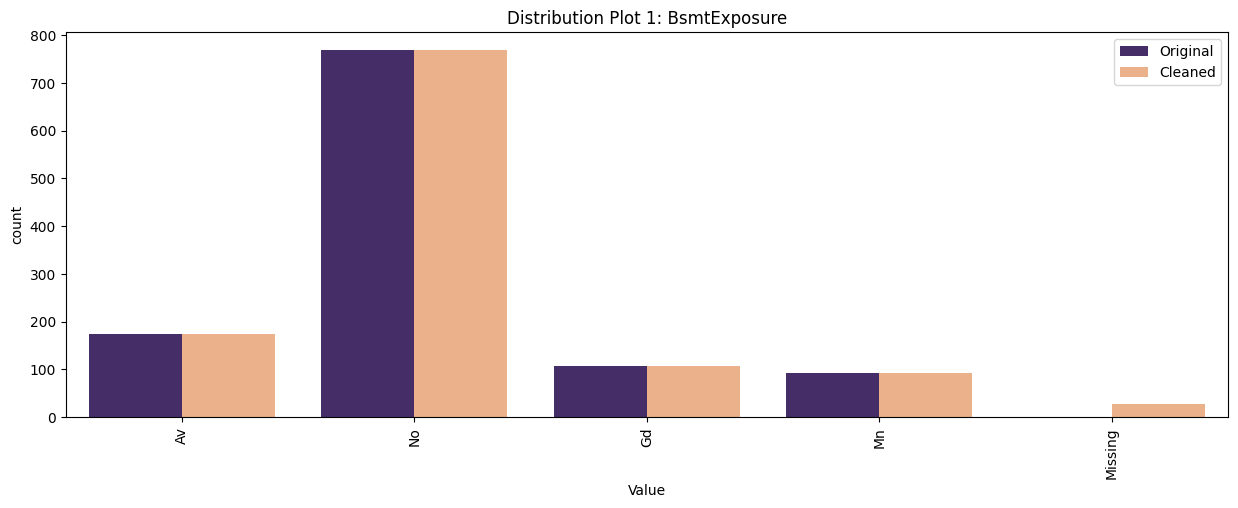

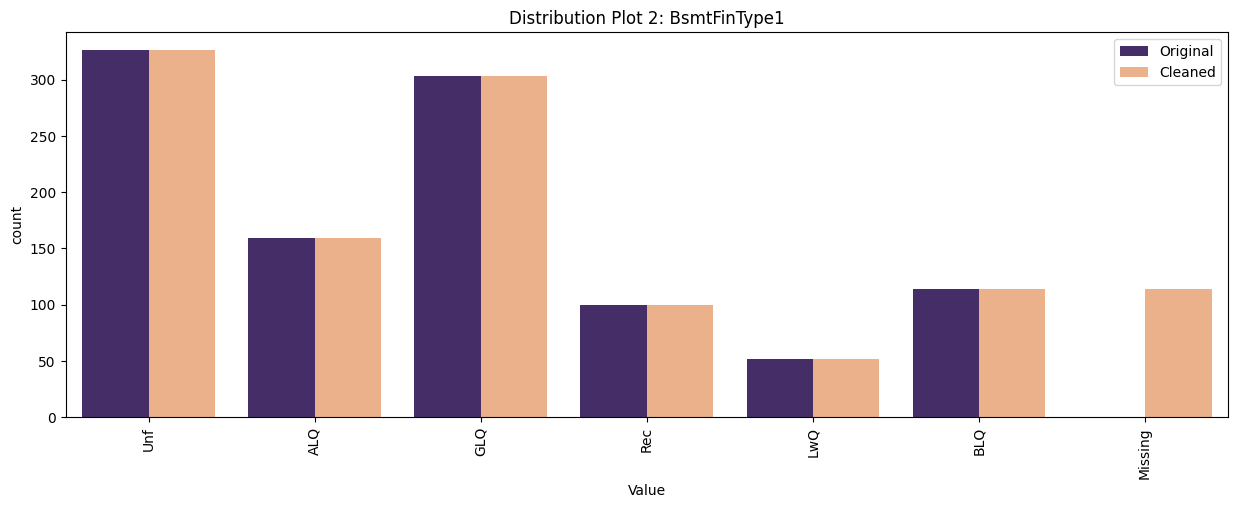

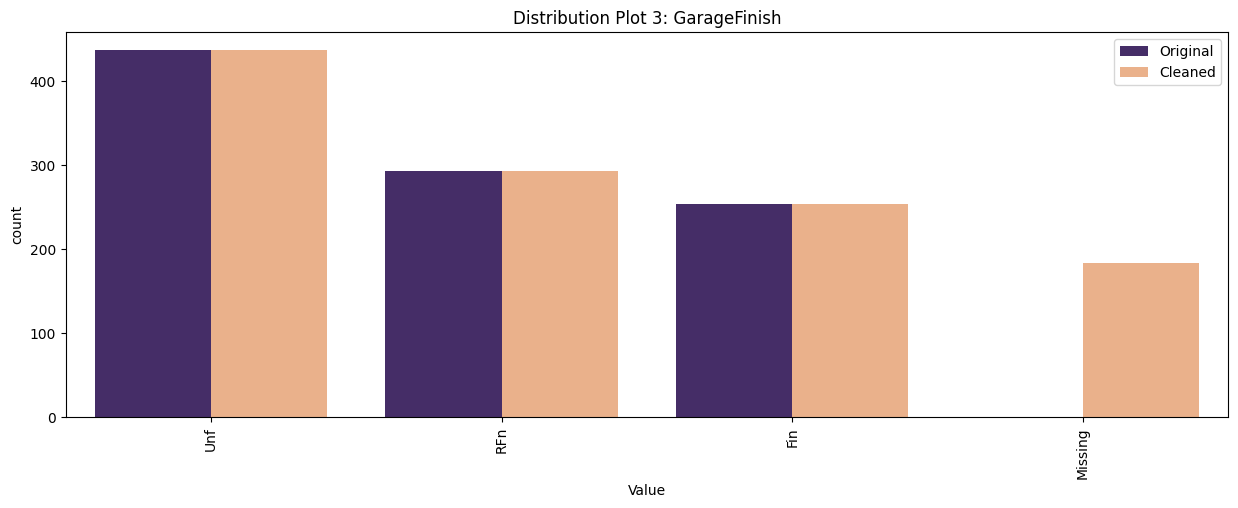

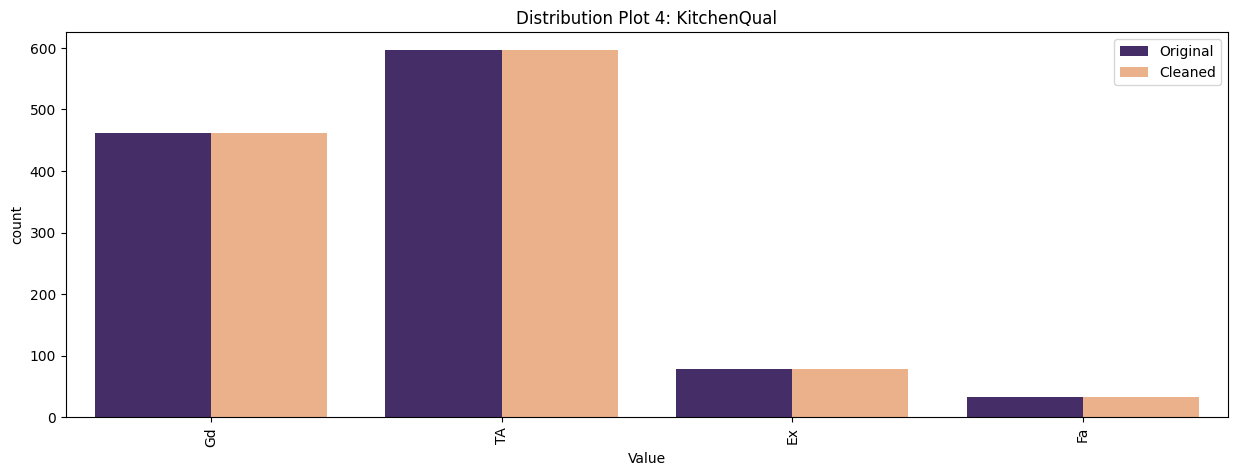

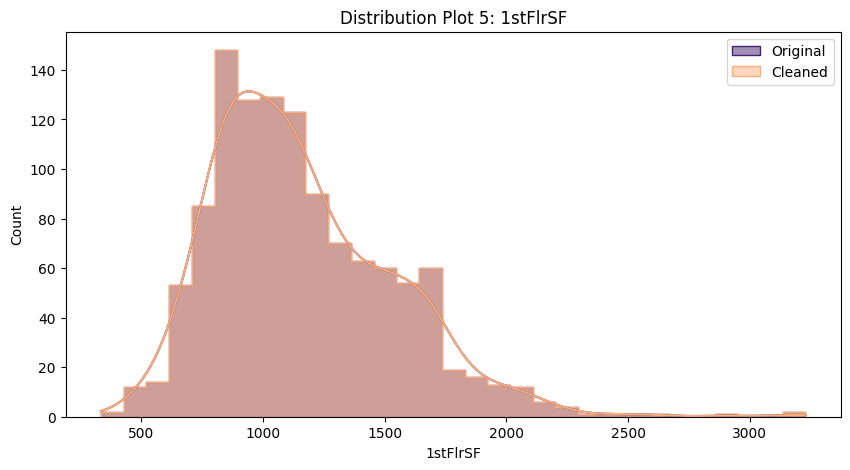

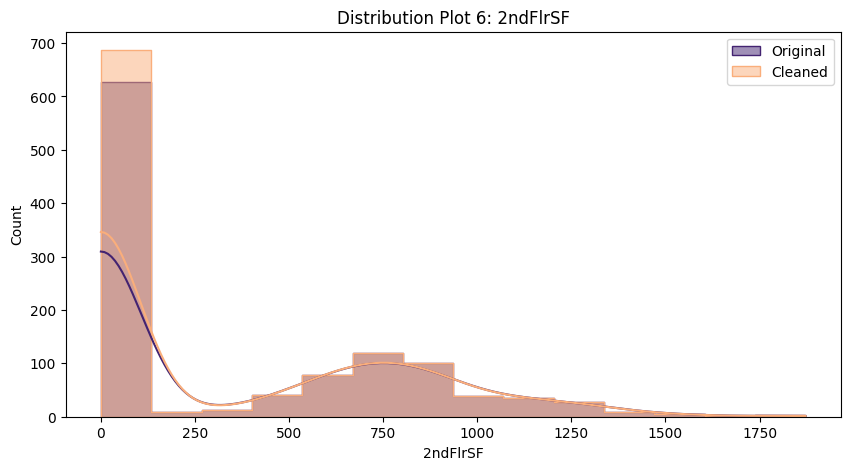

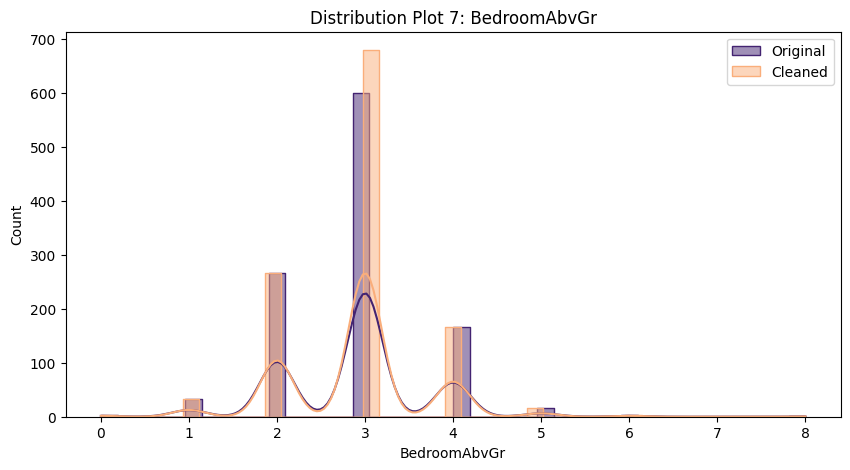

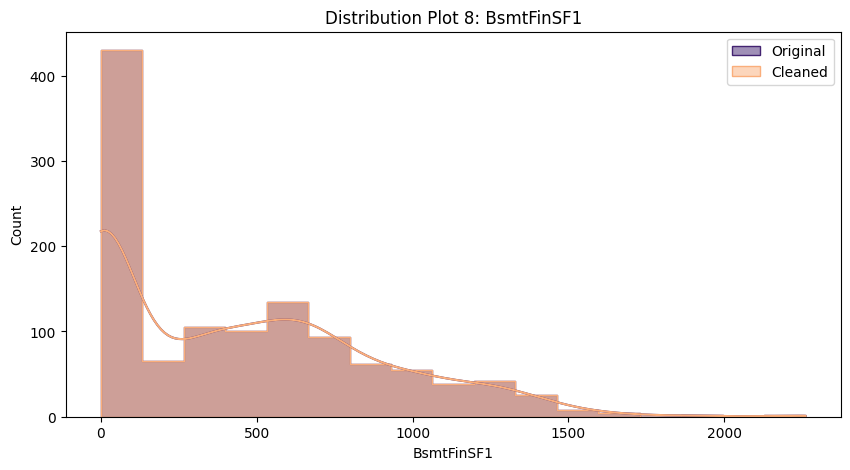

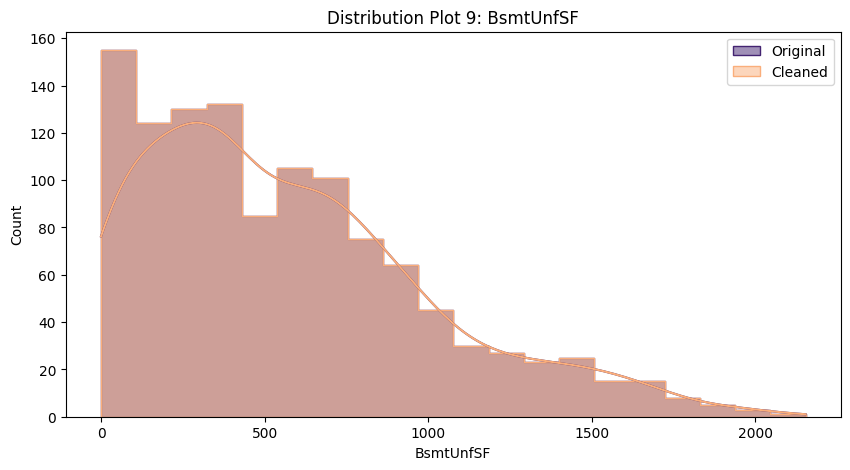

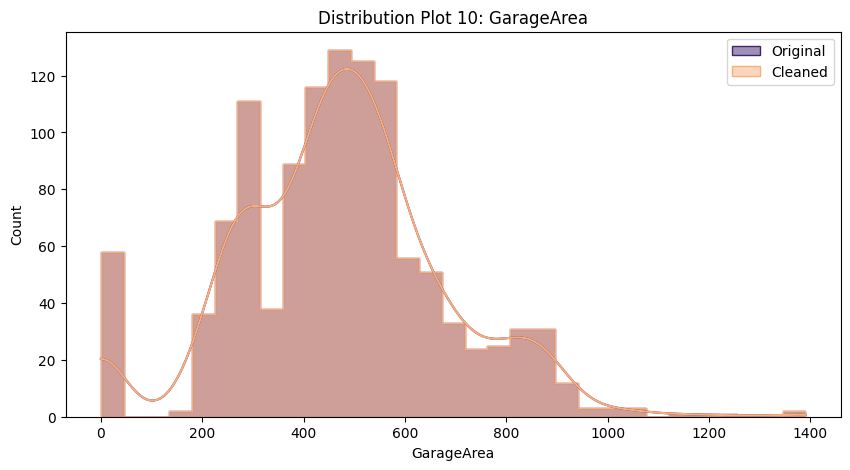

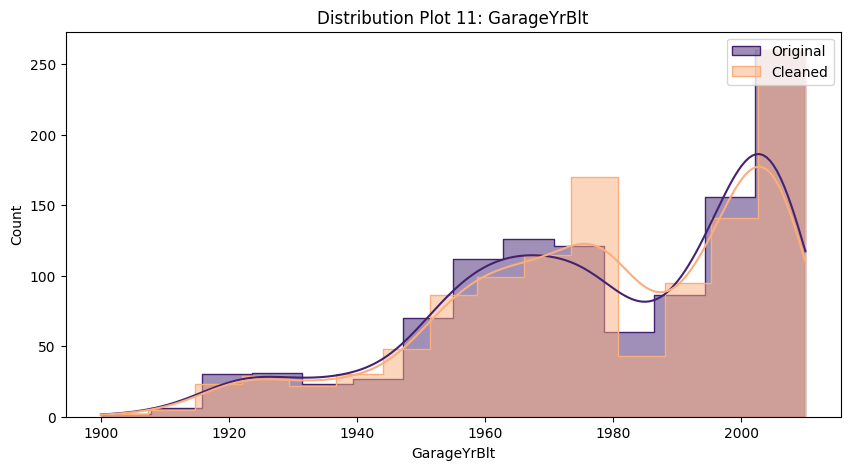

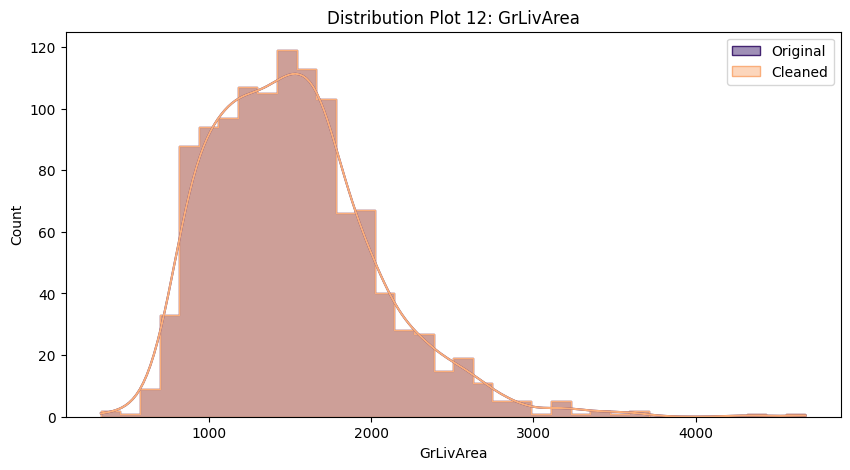

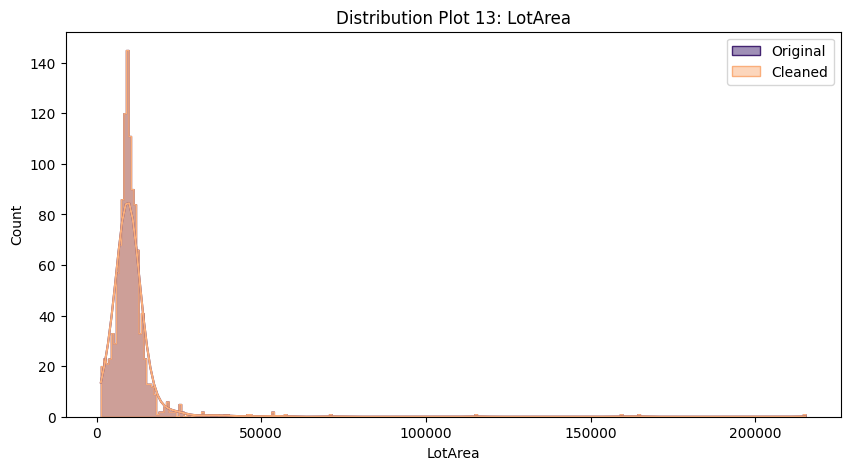

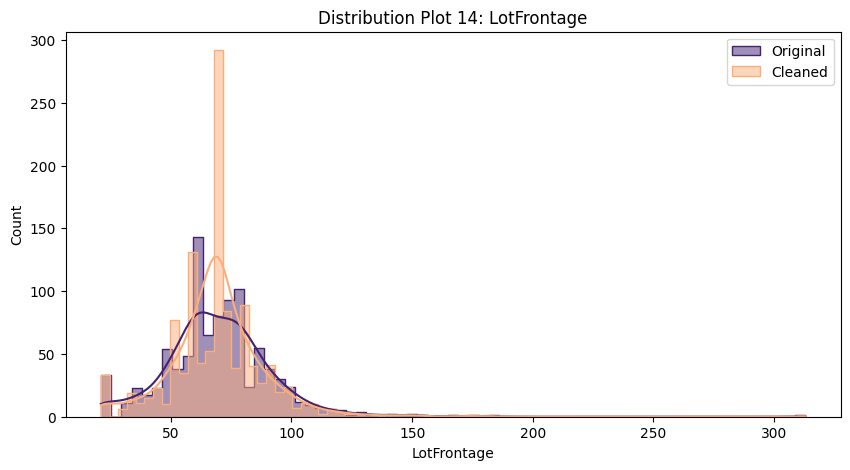

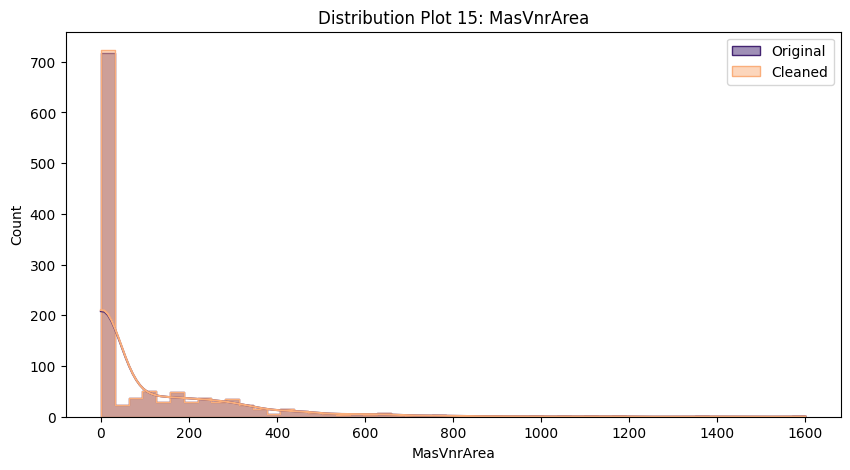

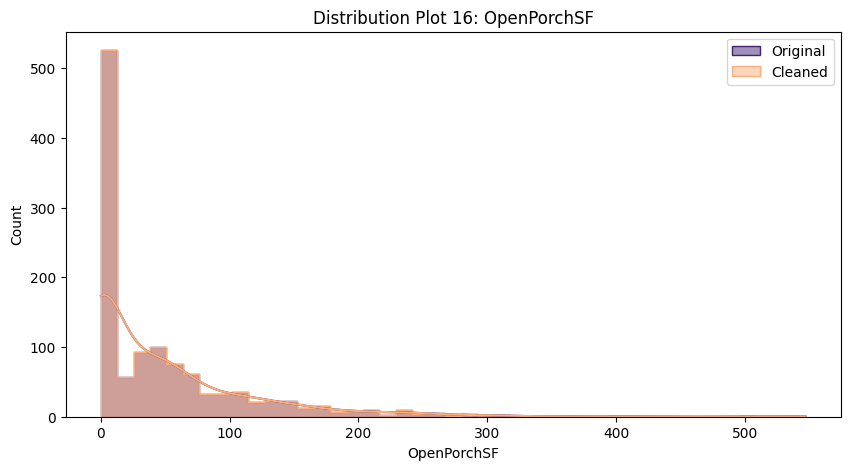

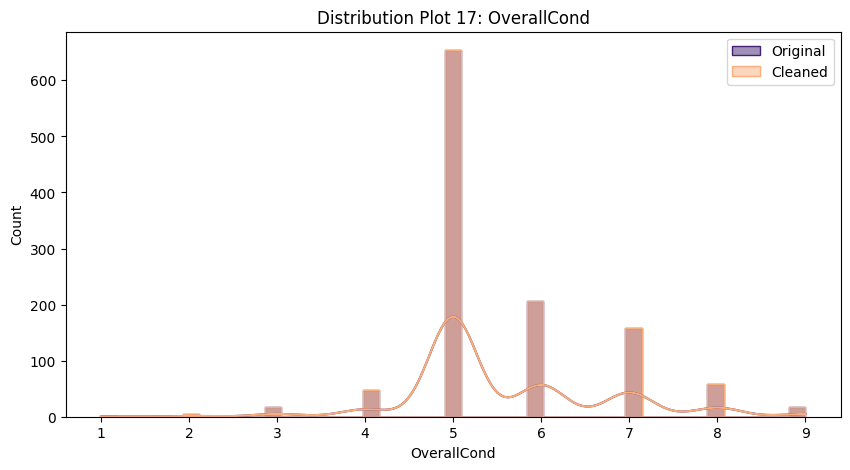

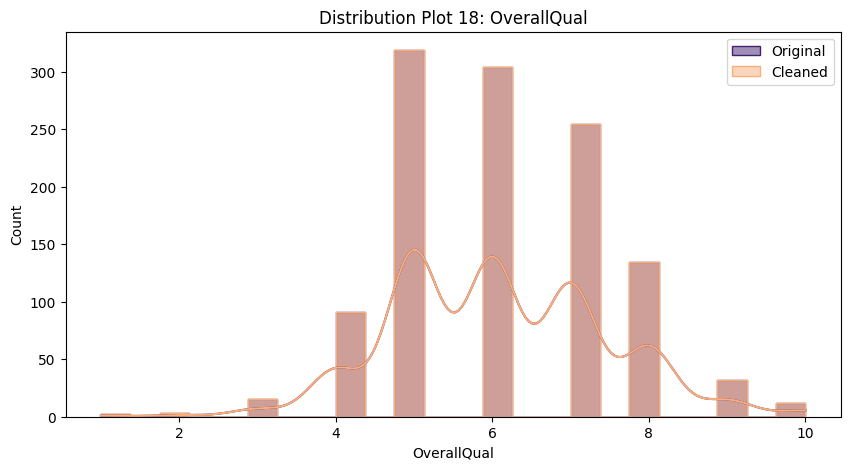

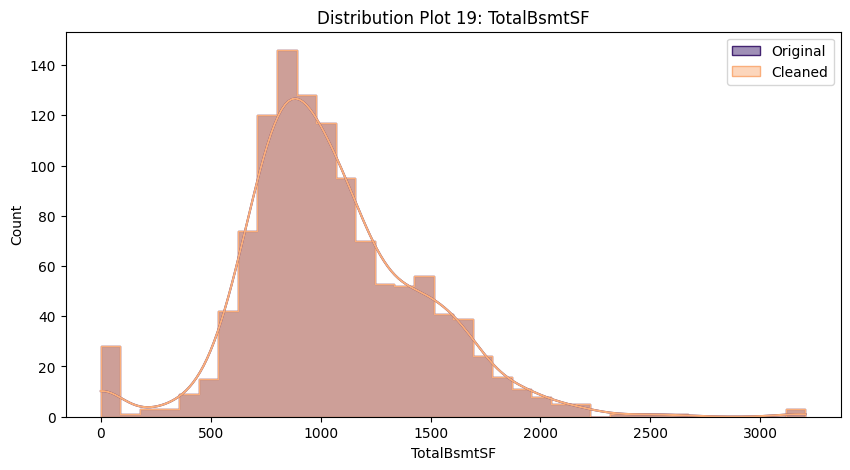

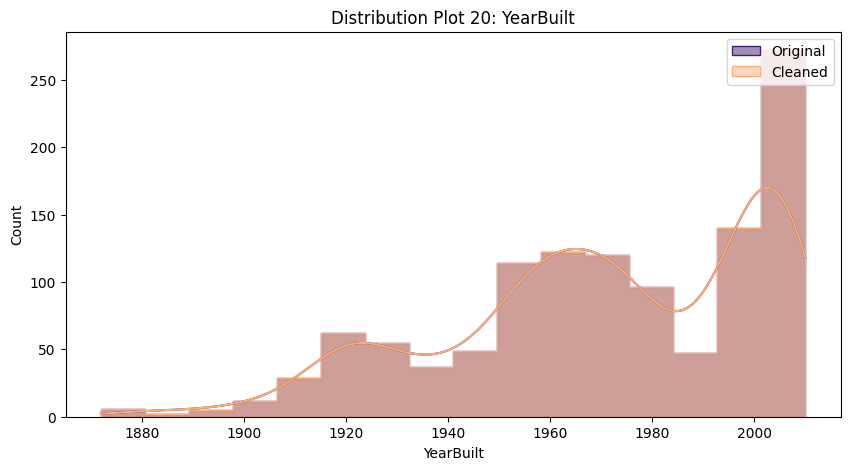

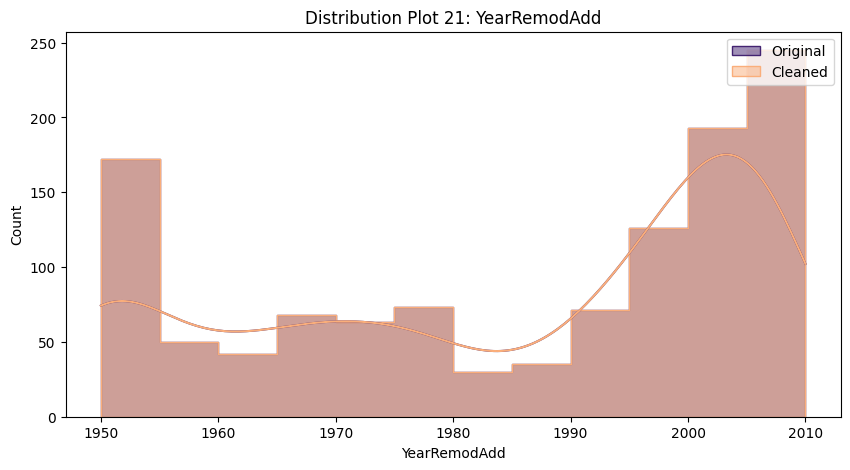

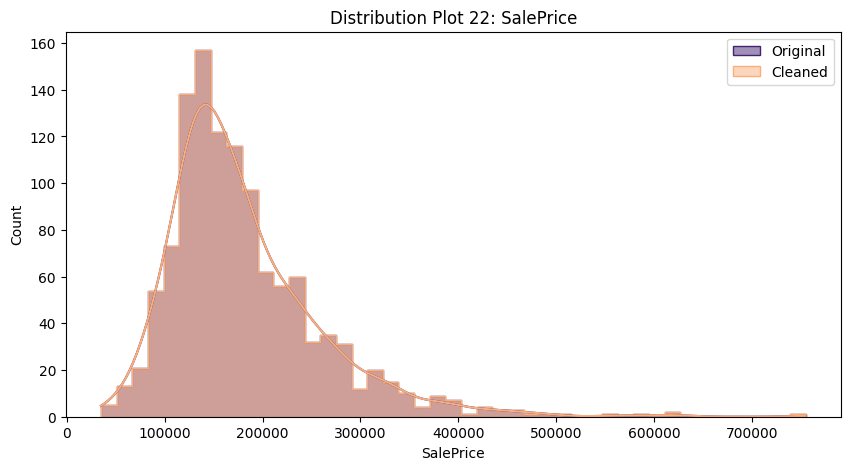

In [32]:
DataCleaningEffect(df_original=TrainSet, df_cleaned=TrainSet_cat_num_imputed,
                   variables_applied_with_method= all_imputed_variables)


---

# Push cleaned data to Repo

In [ ]:
import os
try:
  os.makedirs(name='outputs/datasets/cleaned')
except Exception as e:
  print(e)

[Errno 17] File exists: 'outputs/datasets/cleaned'


#### Save Train Set

In [34]:
TrainSet_cat_num_imputed.to_csv("outputs/datasets/cleaned/TrainSetCleaned.csv", index=False)

#### Save Test Set

In [35]:
TestSet_cat_num_imputed.to_csv("outputs/datasets/cleaned/TestSetCleaned.csv", index=False)